<a href="https://colab.research.google.com/github/ClintJensen/CovNet_Human_Drawings/blob/master/code/CovNet/CovNet_VGG_19_Drawings_fc2_Clint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature extraction from intermediate layers with VGG19 architecture with weights pre-trained on ImageNet

In [1]:
# Here we use Keras API to process the data by using VGG19 
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd 


In [ ]:
# The code below produces this error 
# OSError: SavedModel file does not exist at: vgg19_trained.h5/{saved_model.pbtxt|saved_model.pb}
#base_model = tf.keras.models.load_model("vgg19_trained.h5")

# Load base model with imagenet pre-trained weights 
base_model = VGG19(weights='imagenet')

574717952/574710816 [==============================] - 3s 0us/step


## VGG-19 architecture  

VGG-19 is a 19 layer Convolutional Neural Network  
The **input layer** takes a 224x224x3 image (high, width, color channels)  
The **output layer** is a softmax on 1000 classes  
The **feature extraction** part goes from the input layer to the last max pooling layer  
The **classification** part goes from the last max pooling layer to the output layer  

Simonyan, and Zisserman paper:  
https://arxiv.org/pdf/1409.1556.pdf  
Keras reference:  
https://keras.io/applications/#vgg19    
![VGG-19 architecture](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

In [ ]:
#To save model locally run this:
#base_model.save("vgg19_trained.h5")

In [ ]:
# Here we can see the progression from layer to layer 
# The output shape column shows how the image gets compressed as 
# it pass through the layers
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Pick a layer for feature extraction 
# Here we pick the maxpooling layer in block 5
feature_layer = "fc2"

# To check other layers
# feature_layer = "block1_pool "
# feature_layer = "block1_conv1 "
 
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

In [ ]:
# Images are storage in GitHub. By running this we clone the data into Colab
! git clone https://github.com/ClintJensen/CovNet_Human_Drawings
# Run this just once per sesion

# Now repo data is available in Colab local environment
!ls CovNet_Human_Drawings/data

Cloning into 'CovNet_Human_Drawings'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 1352 (delta 95), reused 0 (delta 0), pack-reused 1200
Receiving objects: 100% (1352/1352), 121.10 MiB | 39.87 MiB/s, done.
Resolving deltas: 100% (508/508), done.
Checking out files: 100% (1491/1491), done.
cluster-dataframes   dap-metadata-kids	merged-dataframes-prediction
dap-drawings-adults  DAP_NEXT_Images	optimization-results
dap-drawings-all     edit-csv		README.md
dap-drawings-kids    edit-filenames	vectors-features


In [ ]:
# Now repo data is available in Colab local environment
!ls CovNet_Human_Drawings

code					data	 README.md
CovNet_VGG_19_Drawings_fc2_Clint.ipynb	figures  relevant_literature


In [ ]:
# Drawing data
# You can run this if you want to check the path for a single image
# ! ls CovNet_Human_Drawings/data/humans_drawings/

In [ ]:
# Load and reshape the image to be feed into the model
#img_path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/DAM3D001_P_CUAedit.jpg'
#img_path = 'CovNet_Human_Drawings/data/humans_drawings/DAM001_F_DAPedit.jpg'

img_path = '../content/CovNet_Human_Drawings/data/DAP_NEXT_Images/DAM001_F_DAPedit.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

The code below differs from Pablos's file

In [ ]:
# Do the feature extraction
fc2_features = model.predict(x)

In [ ]:
# In block 5, we can check that feature has the same shape that the maxpooling 
# layer in block 5 (above drawing)
# Print tensor shape
print (fc2_features.shape)

(1, 4096)


In [ ]:
# Print extracted feature as a tensor (i.e., feature)
# print(fc2_features)

In [ ]:
# Print extracted feature flattened as a 1D vector
vgg19_feature_np = np.array(fc2_features)
vgg19_feature_np.flatten()

array([1.021663  , 0.7357775 , 0.91477025, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

## Feature extraction from all images with last fully connected layer

In [ ]:
# Get the drawings filenames from directory 
from os import listdir
from os.path import isfile, join

# path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/'
# filenames = [f for f in listdir(path) if isfile(join(path, f))]
# len(filenames) # This should yield the number of images


# If relative path doesn't work, change path as nedeed
path = '../content/CovNet_Human_Drawings/data/DAP_NEXT_Images/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield 305

305

In [ ]:

# First pick the layer for feature extraction
# A list of the layers' names is obtained by running "base_model.summary()"
feature_layer = "fc2" # let's pick the last fully conected layer as example
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

# Let's create a list to save flattened tensors as vectors
vgg19_feature_list = []

# Loop over filenames and append flattened tensor to vector list
for fname in filenames:
  # This part of the loop reshape and preprocess the input images 
  img_path = path + fname
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  # This part of the loop extract the featues and flatten the tensors to vectors
  vgg19_feature = model.predict(x)
  vgg19_feature_np = np.array(vgg19_feature)
  vgg19_feature_list.append(vgg19_feature_np.flatten())
  

In [ ]:
# Let's pass the VGG19 feature list to a numpy array
vgg19_feature_list_np = np.array(vgg19_feature_list)
type(vgg19_feature_list_np)
print(vgg19_feature_list_np.shape)

(305, 4096)


In [ ]:
#And write it to a csv file
np.savetxt("vgg19_fc2_DAP.csv", vgg19_feature_list_np, delimiter=",")

In [ ]:
#And write it to a csv file
df = pd.DataFrame(filenames)
df.to_csv("filenames_vgg19_fc2_DAP.csv")

# Hierarchical clustering on drawings with vectors extracted from VGG19

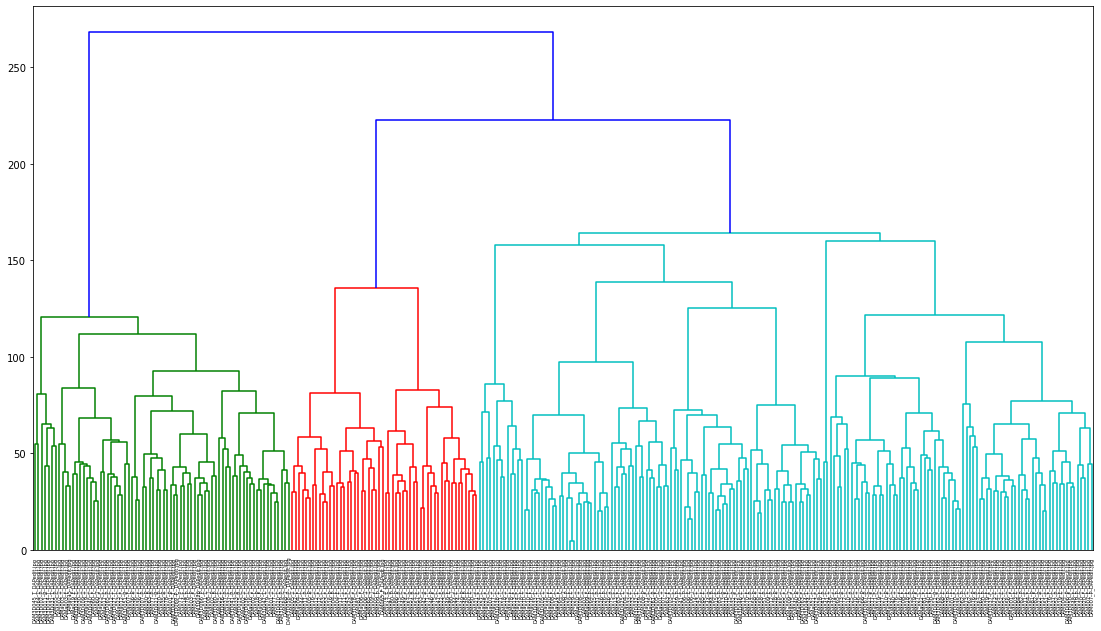

In [ ]:
# Let's use scipy to plot a dendogram to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# Let's use the 'ward' method to compute the distance between clusters which 
# minimize the variance between clusters
linked = linkage(vgg19_feature_list_np, 'ward')

# Use filenames as label list
labelList = filenames

# Plot the dendogram as a descendeing tree
plt.figure(figsize=(19, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [ ]:
# Based on the dendogram, it looks like we have 11 clusters
# Let's use sklearn to perform the hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

k = 11
hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
hclustering.fit(vgg19_feature_list_np)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=11)

In [ ]:
# Print the cluster to which each image was assigned to
print(hclustering.labels_)  

[ 4  2  0  2 10  3  8  1  0  0  0  3  0  4  4  3  0  0  4  0  1  4 10  0
  3  0  6  2  3  8  2  6  8  2  4  0  6  9  1  7  7  8  4  4  4  8  0  1
  8 10  2  8  5  4  0  8  7  0  6  2  0  7 10  2  4  0  8  0  6  3  2  1
  6  2  0  3  0  5  9  6  0  1  0  2  3  6  6  5  2  6  4 10  3  3  2  0
  8  8  0  1  1  2  0  0  6  2  8  2  0  0  4  6  4  0  2  2  7  5  6  4
  4  7  6  6  5  3  6  6  0  4  4  0  1  6  2  4  7  2  0  7  0  0  6  4
  1  1  2  1  7  0  0  3  2  0  2  2  4  4  8  0  1  5  1  2  1  3  0  4
  5  2  1  8  2  3  0  6  0  1  4  4  2  1  4  3  0  1  2  3  4  2  0  1
  6  6  8  0  0  0  8  5  1  5  0  3  8  1  0 10  6  2  1  3  4  2  3  6
  1  3  0  0  3  1  8  0  0  7  4  0  4  7  4  0 10  3  7  2  1  7  0  0
  0  0  7  2  1  5  0  5  1  2  0  0  6  2  1  7  7  5  6  1  1  8  0  5
  3  0  1  8  3  2  3  1  8  1  1  0  3  4  0  2  4  4  0  7  4  8  4  6
  0  7  1  7  2  1  4  7  0  1  8  4  7  3  2  2  2]


In [ ]:
#And write it to a csv file
#np.savetxt("hclustering.clusterValues.csv", hclustering.labels_, delimiter=",")

In [ ]:

#pd.DataFrame(labelList).to_csv("hclustering.imageLabels.csv", header=None, index=None)

## Plotting drawings by cluster

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd

In [ ]:
# First, let's create a 2D pandas dataframe 
# this is necessary to plot the images by cluster later

# get filenames as a numpy aray
filenames_np = np.asarray(filenames)

# get cluster labels as a numpr array
clusters_np = hclustering.labels_

# create pandas dataframe stacking numpy arrays by column
drawings_df = pd.DataFrame({'filenames_np':filenames_np, 'clusters_np':clusters_np})

print(type(drawings_df))
print("Shape: ", drawings_df.shape)
print(drawings_df.head())

<class 'pandas.core.frame.DataFrame'>
Shape:  (305, 2)
             filenames_np  clusters_np
0   DAMa022_T_DAPedit.jpg            4
1    DAM003_T_DAPedit.jpg            2
2  DAM3D015_P_DAPedit.jpg            0
3    DAM013_F_DAPedit.jpg            2
4  DAM3D031_T_DAPedit.jpg           10


In [ ]:
drawings_df

,filenames_np,clusters_np
0,DAMa022_T_DAPedit.jpg,4
1,DAM003_T_DAPedit.jpg,2
2,DAM3D015_P_DAPedit.jpg,0
3,DAM013_F_DAPedit.jpg,2
4,DAM3D031_T_DAPedit.jpg,10
...,...,...
300,DAM024_T_DAPedit.jpg,7
301,DAM004_F_DAPedit.jpg,3
302,DAM033_T_DAPedit.jpg,2
303,DAM031_T_DAPedit.jpg,2


In [ ]:
#And write it to a csv file
drawings_df = pd.DataFrame(drawings_df)

#pd.DataFrame(labelList).to_csv("drawings_df.csv", header=None, index=None)

drawings_df.to_csv("drawings_df_fc2_11clust.csv", index=None)

In [ ]:
# Let's subset the dataframe into 11 dataframes by cluster group

def subCluster(subcluster):
    '''Function to subset dataframes by cluster'''
    cluster = drawings_df.loc[drawings_df['clusters_np'] == subcluster]
    return cluster

cluster_1 = subCluster(0)
print("Length cluster 1: ", len(cluster_1))
print(cluster_1.head())

cluster_2 = subCluster(1)
print("Length cluster 2: ", len(cluster_2))
print(cluster_2.head())

cluster_3 = subCluster(2)
print("Length cluster 3: ", len(cluster_3))
print(cluster_3.head())

cluster_4 = subCluster(3)
print("Length cluster 4: ", len(cluster_4))
print(cluster_4.head())

cluster_5 = subCluster(4)
print("Length cluster 5: ", len(cluster_5))
print(cluster_5.head())

cluster_6 = subCluster(5)
print("Length cluster 6: ", len(cluster_6))
print(cluster_6.head())

cluster_7 = subCluster(6)
print("Length cluster 7: ", len(cluster_7))
print(cluster_7.head())

cluster_8 = subCluster(7)
print("Length cluster 8: ", len(cluster_8))
print(cluster_8.head())

cluster_9 = subCluster(8)
print("Length cluster 8: ", len(cluster_9))
print(cluster_9.head())

cluster_10 = subCluster(9)
print("Length cluster 10: ", len(cluster_10))
print(cluster_10.head())

cluster_11 = subCluster(10)
print("Length cluster 11: ", len(cluster_11))
print(cluster_11.head())

Length cluster 1:  67
              filenames_np  clusters_np
2   DAM3D015_P_DAPedit.jpg            0
8     DAM3D026_DAPedit.jpg            0
9    DAMa011_T_DAPedit.jpg            0
10   DAMa023_T_DAPedit.jpg            0
12   DAMa023_F_DAPedit.jpg            0
Length cluster 2:  38
            filenames_np  clusters_np
7   DAM062_F_DAPedit.jpg            1
20  DAM073_T_DAPedit.jpg            1
38  DAM062_T_DAPedit.jpg            1
47  DAM020_T_DAPedit.jpg            1
71  DAM079_F_DAPedit.jpg            1
Length cluster 3:  42
             filenames_np  clusters_np
1    DAM003_T_DAPedit.jpg            2
3    DAM013_F_DAPedit.jpg            2
27   DAM029_F_DAPedit.jpg            2
30   DAM031_P_DAPedit.jpg            2
33  DAMa005_F_DAPedit.jpg            2
Length cluster 4:  27
              filenames_np  clusters_np
5     DAM009_T_DAPedit.jpg            3
11    DAM053_T_DAPedit.jpg            3
15  DAM3D018_F_DAPedit.jpg            3
24   DAMa006_F_DAPedit.jpg            3
28    DAM0

In [ ]:
# Let's check cluster size to get a better idea of how to 
# layout the grid for plotting

print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))
print(len(cluster_4))
print(len(cluster_5))
print(len(cluster_6))
print(len(cluster_7))
print(len(cluster_8))
print(len(cluster_9))
print(len(cluster_10))
print(len(cluster_11))

67
38
42
27
38
13
27
21
23
2
7


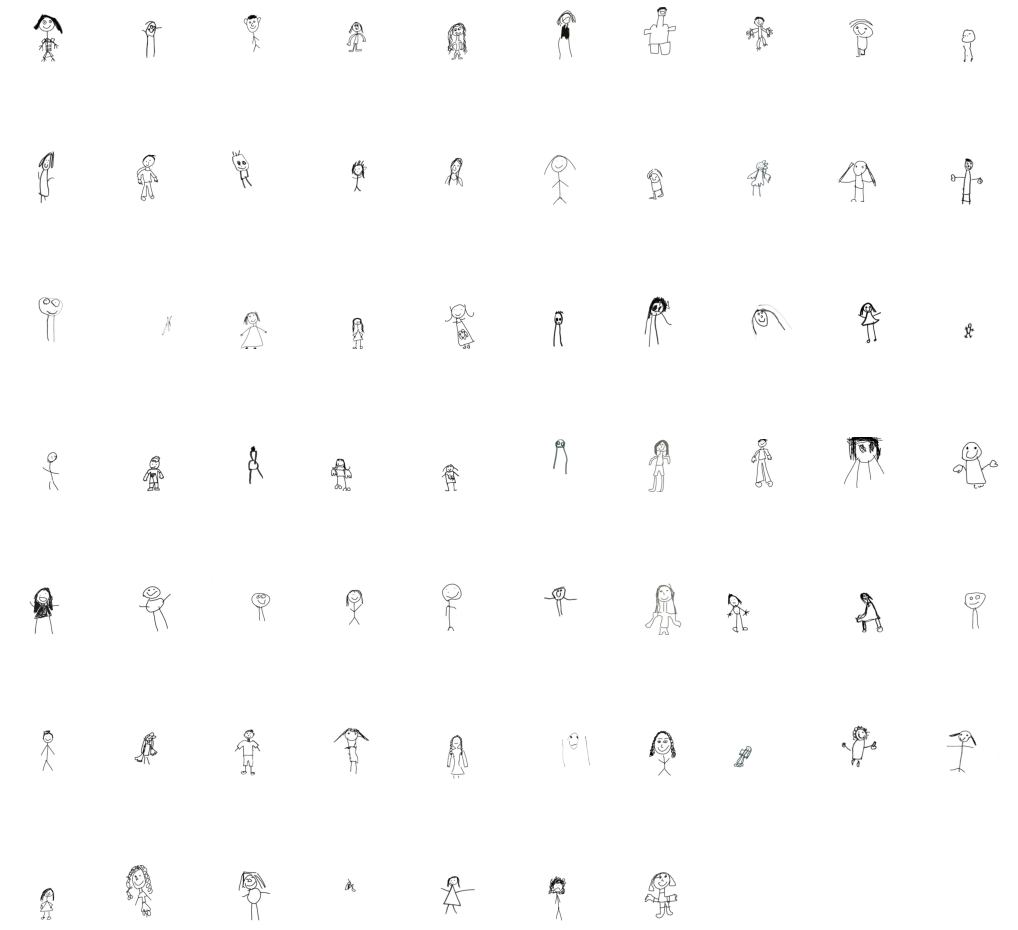

In [ ]:
# Let's plot all images classified together in cluster 1

# Image parameters
width = 10
height = 10
nrows = 7
ncols = 10
fig=plt.figure(figsize=(18, 18)) 

# pick the cluster to plot
cluster = cluster_1

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')
plt.savefig('cluster_1_fc2_drawings_DAP.png', dpi=200)
plt.show()


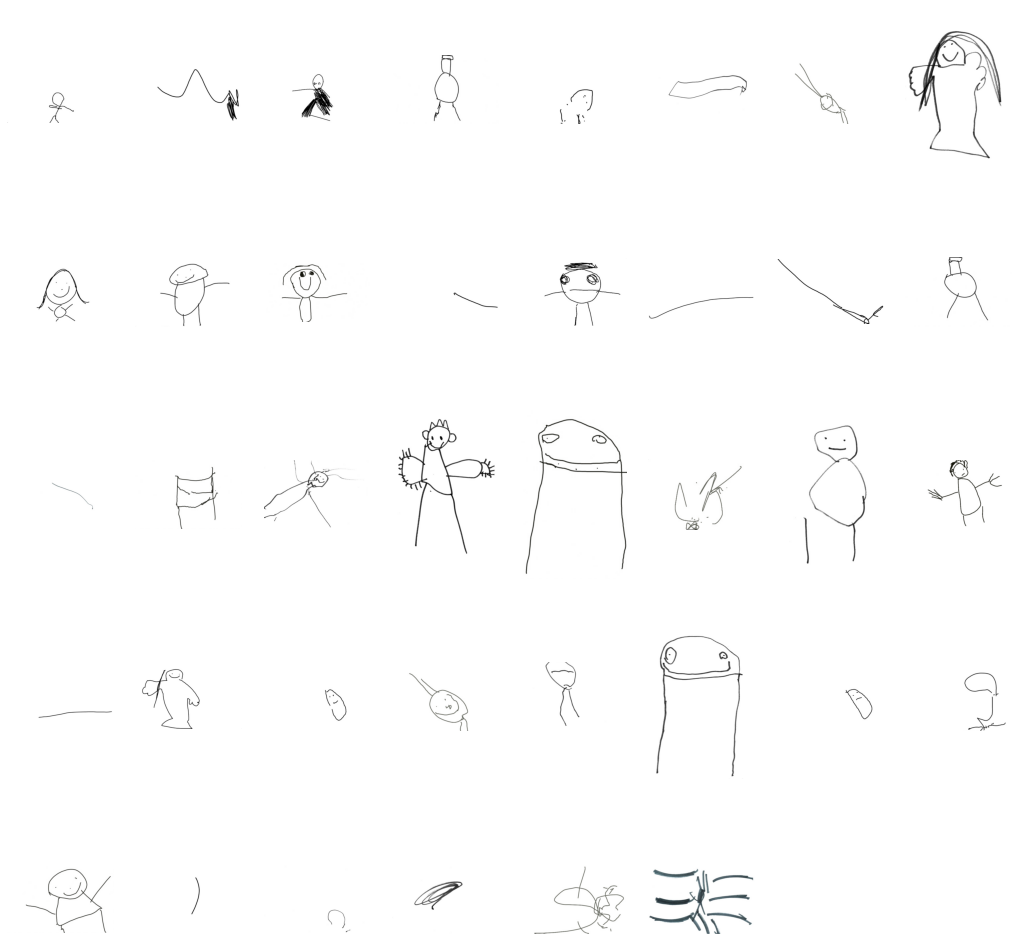

In [ ]:
# Let's plot all images classified together in cluster 2

# Image parameters
width = 10
height = 10
nrows = 5
ncols = 8
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_2

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_2_fc2_drawings_DAP.png', dpi=200)
plt.show()

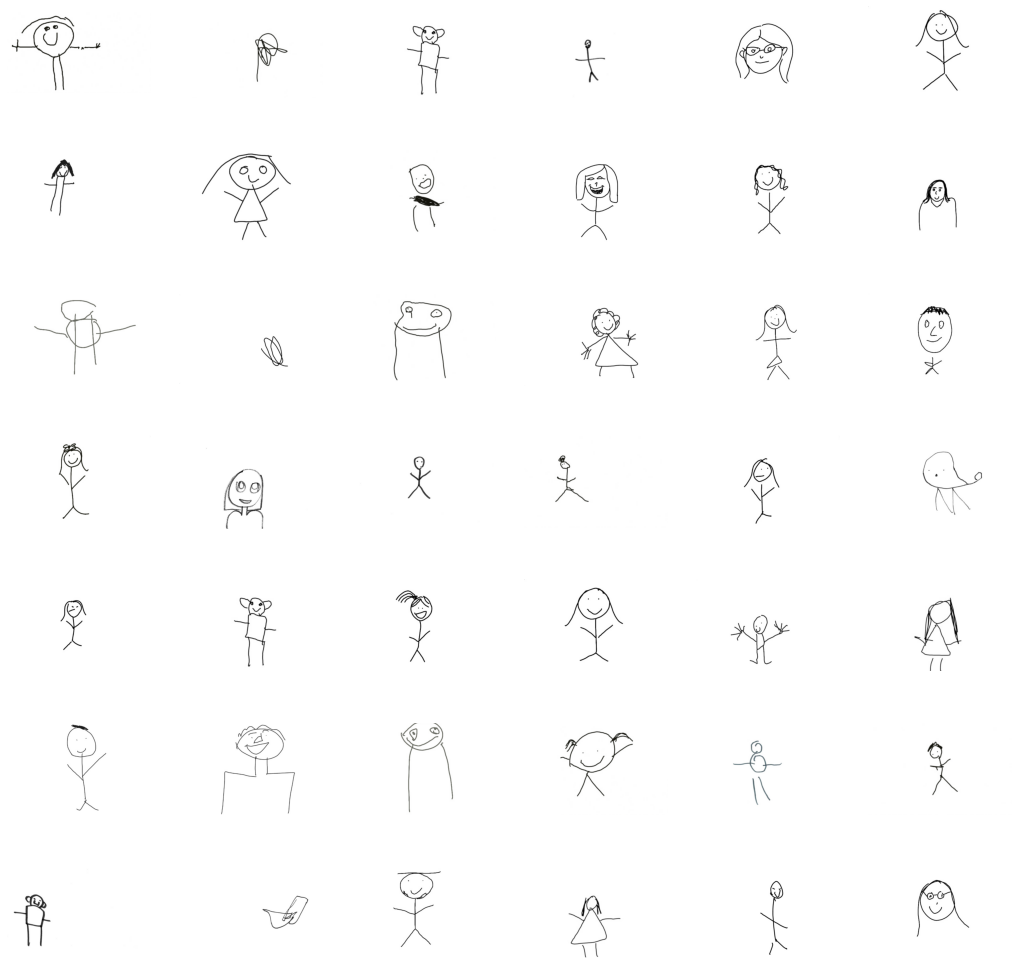

In [ ]:
# Let's plot all images classified together in cluster 3

# Image parameters
width = 10
height = 10
nrows = 7
ncols = 6
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_3

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_3_fc2_drawings_DAP.png', dpi=200)
plt.show()

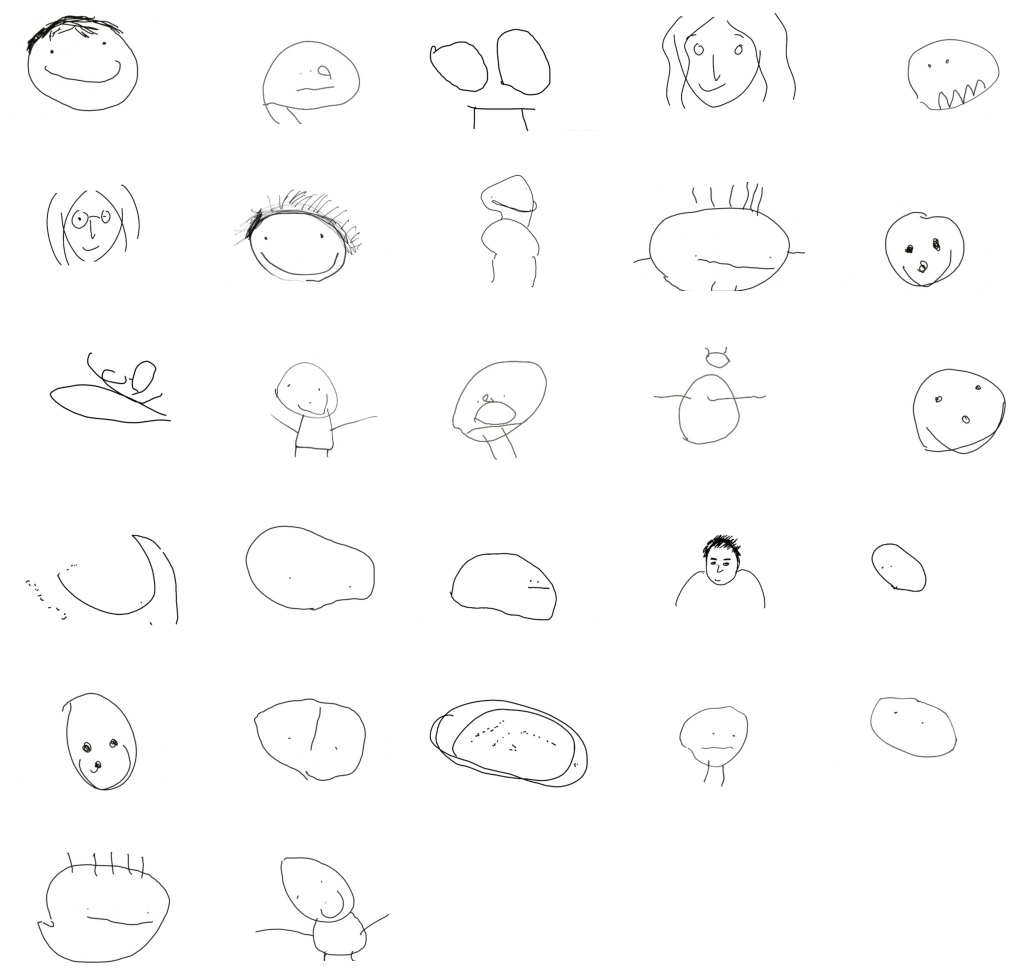

In [ ]:
# Let's plot all images classified together in cluster 4

# Image parameters
width = 10
height = 10
nrows = 6
ncols = 5
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_4

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_4_fc2_drawings_DAP.png', dpi=200)
plt.show()

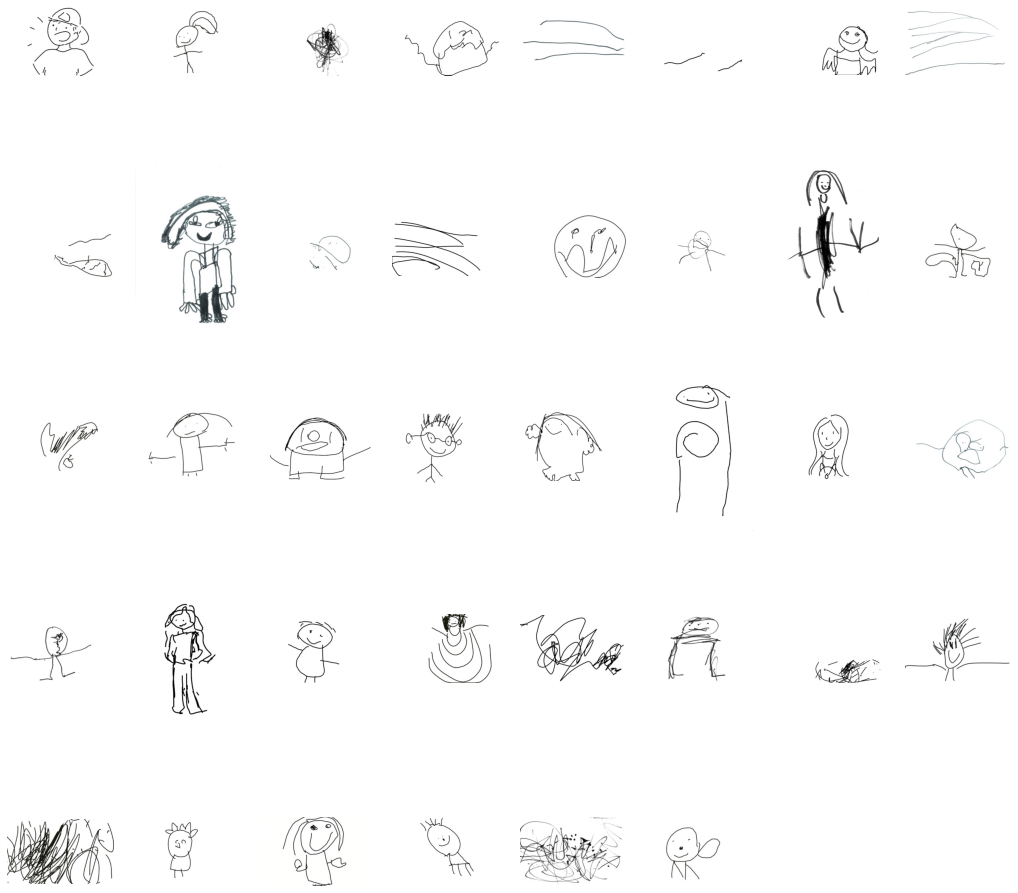

In [ ]:
# Let's plot all images classified together in cluster 5

# Image parameters
width = 10
height = 10
nrows = 5
ncols = 8
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_5

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_5_fc2_drawings_DAP.png', dpi=200)
plt.show()

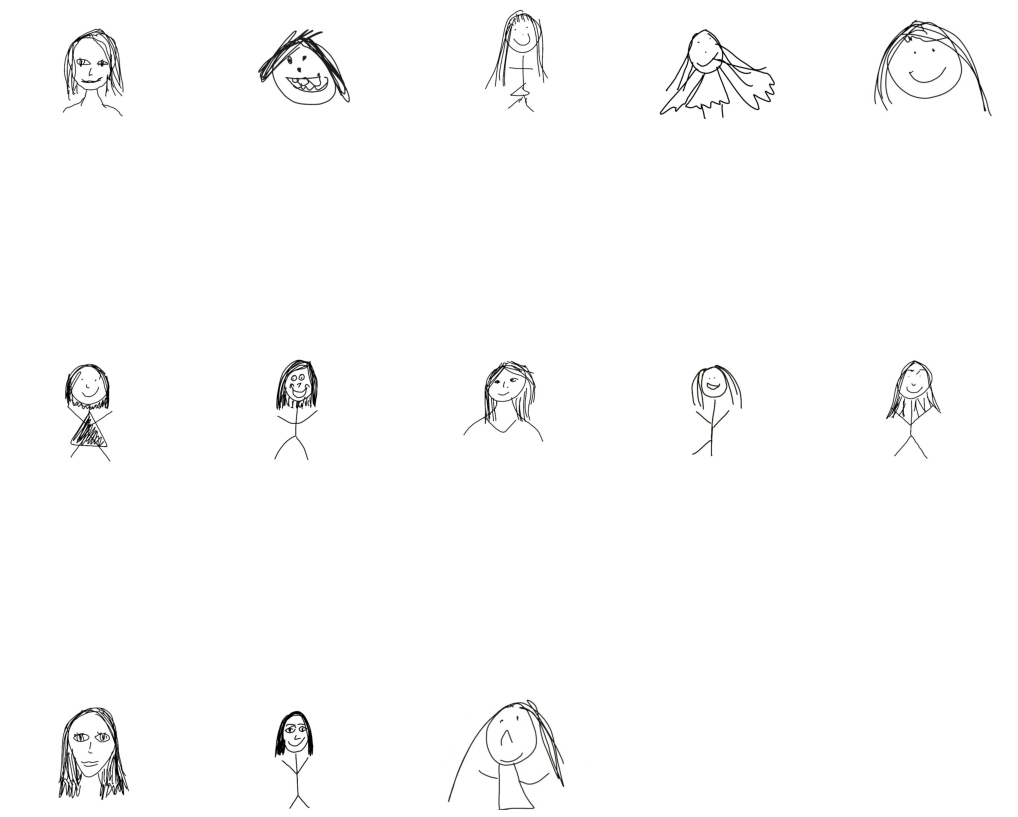

In [ ]:
# Let's plot all images classified together in cluster 6

# Image parameters
width = 10
height = 10
nrows = 3
ncols = 5
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_6

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_6_fc2_drawings_DAP.png', dpi=200)
plt.show()

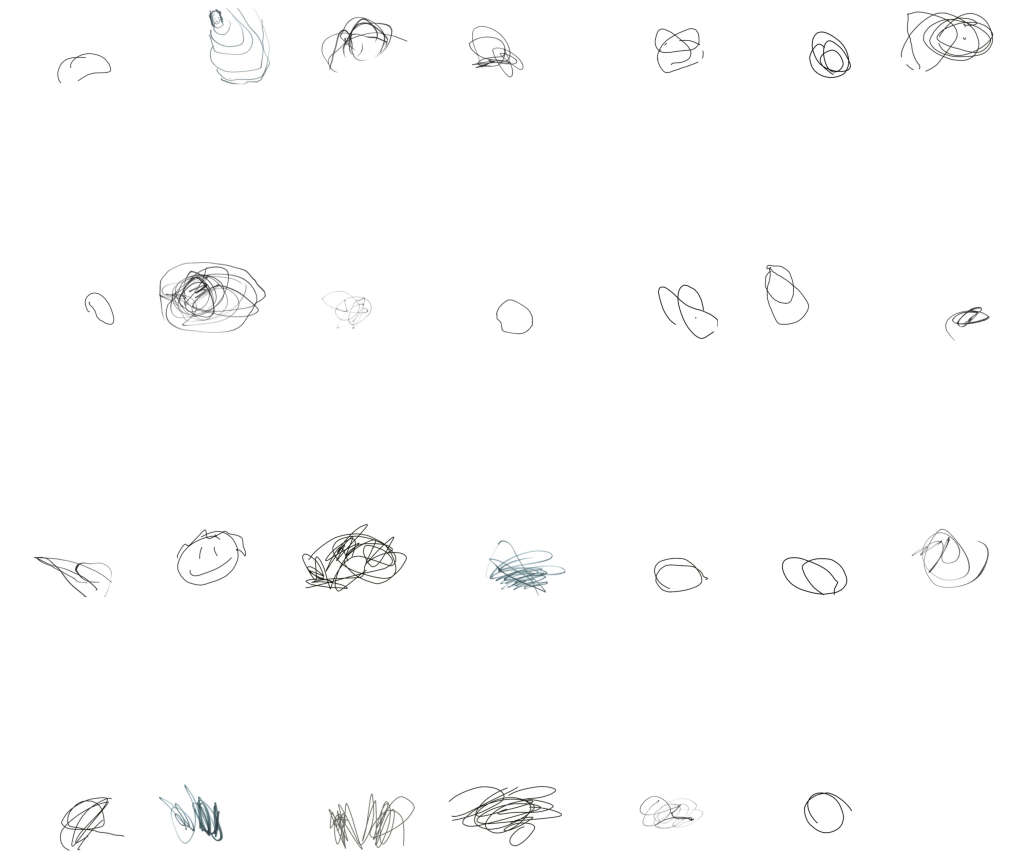

In [ ]:
# Let's plot all images classified together in cluster 7

# Image parameters
width = 10
height = 10
nrows = 4
ncols = 7
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_7

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_7_fc2_drawings.png', dpi=200)
plt.show()

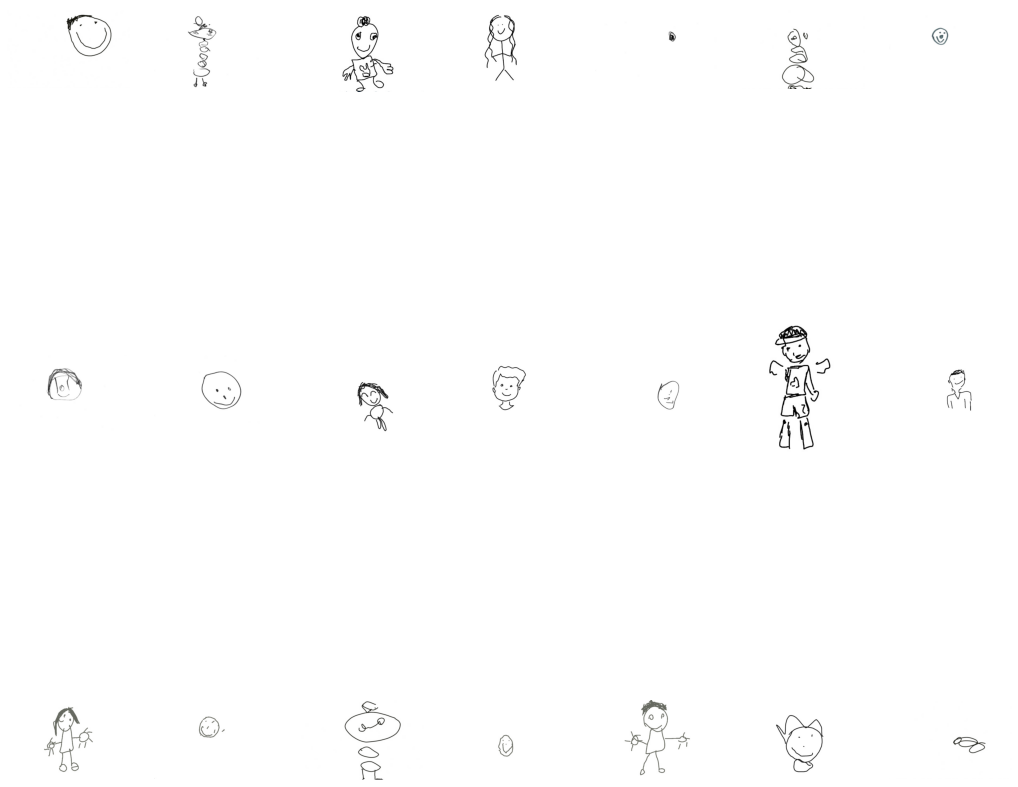

In [ ]:
# Let's plot all images classified together in cluster 8

# Image parameters
width = 10
height = 10
nrows = 3
ncols = 7
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_8

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_8_fc2_drawings.png', dpi=200)
plt.show()

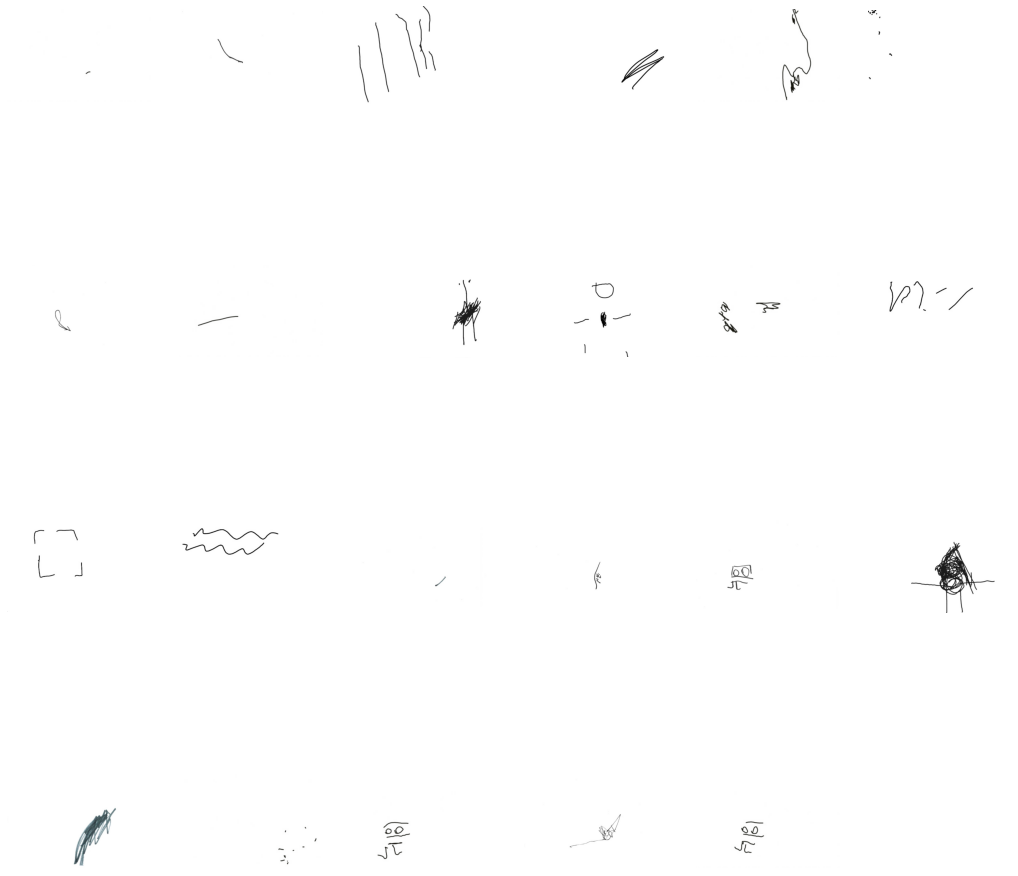

In [ ]:
# Let's plot all images classified together in cluster 9

# Image parameters
width = 10
height = 10
nrows = 4
ncols = 6
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_9

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_9_fc2_drawings.png', dpi=200)
plt.show()

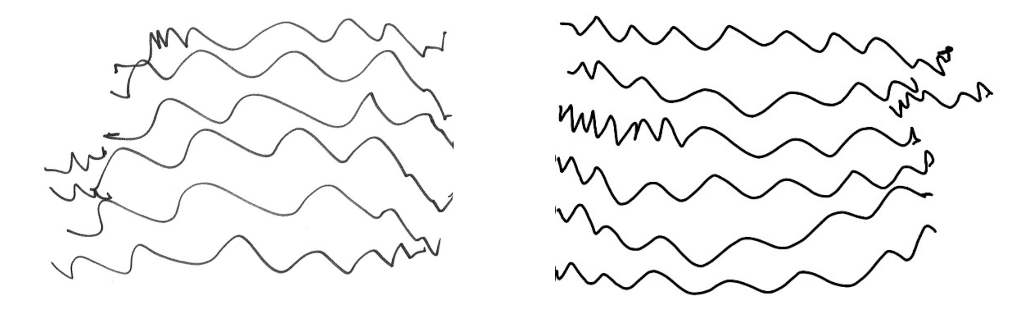

In [ ]:
# Let's plot all images classified together in cluster 10

# Image parameters
width = 10
height = 10
nrows = 1
ncols = 2
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_10

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_10_fc2_drawings_DAP.png', dpi=200)
plt.show()

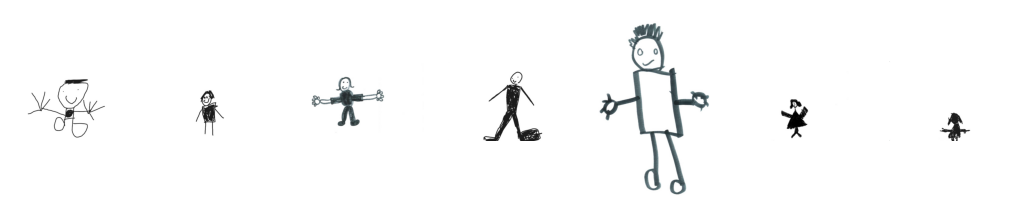

In [ ]:
# Let's plot all images classified together in cluster 11

# Image parameters
width = 10
height = 10
nrows = 1
ncols = 7
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_11

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_11_fc2_drawings_DAP.png', dpi=200)
plt.show()